#### Wildfire Impact on Pollutants 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('air_quality_weather_fires 1.csv')


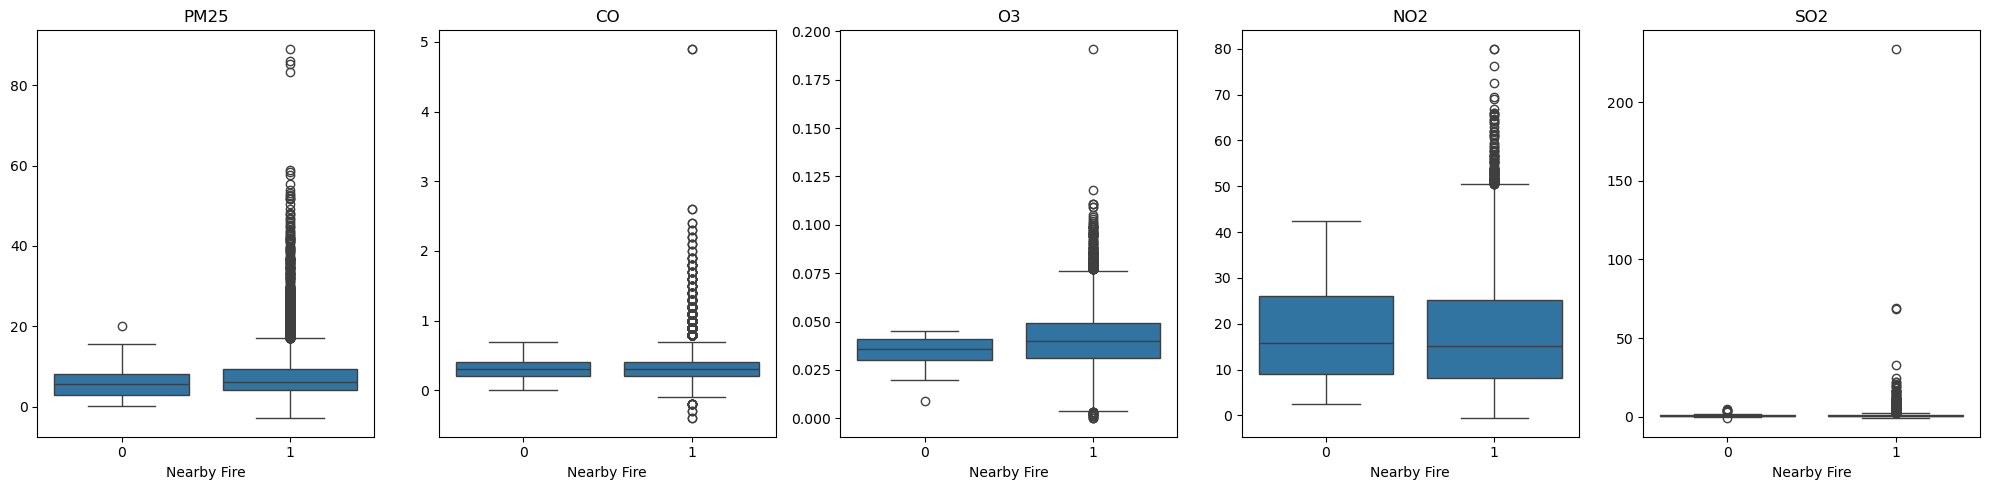

In [33]:
# List of pollutants
pollutants = ['PM25','CO','O3','NO2','SO2']

# Set up the subplot grid
fig, axes = plt.subplots(1, len(pollutants), figsize=(20,5), sharey=False)

for i, pollutant in enumerate(pollutants):
    sns.boxplot(
        x='has_nearby_fire', 
        y=pollutant, 
        data=data, 
        ax=axes[i]
    )
    axes[i].set_title(pollutant)
    axes[i].set_xlabel('Nearby Fire')
    axes[i].set_ylabel('')  # Keep y-labels clean

plt.tight_layout()
plt.show()

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_29692\2331471820.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('fire_intensity')[['PM25','CO','O3','NO2','SO2']].mean().plot(kind='bar')


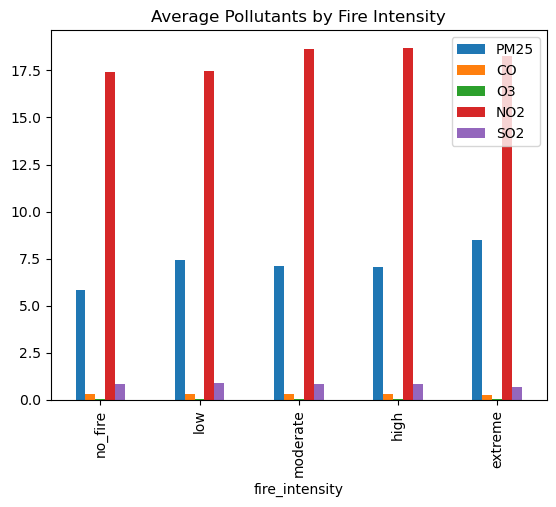

In [37]:
order = ['no_fire', 'low', 'moderate', 'high', 'extreme']
data['fire_intensity'] = pd.Categorical(data['fire_intensity'], categories=order, ordered=True)

data.groupby('fire_intensity')[['PM25','CO','O3','NO2','SO2']].mean().plot(kind='bar')
plt.title('Average Pollutants by Fire Intensity')
plt.show()

NO2: It is consistently the highest among all pollutants across all fire intensity categories, even when there’s no fire. This suggests NO2 levels are high regardless of wildfires likely influenced by traffic or industrial sources. However, there is a slight increase as we get closer to extreme fires.

PM2.5: It increases slightly with fire intensity. It’s higher for extreme and high intensity fires compared to no_fire. This indicates that wildfires contribute to PM2.5, which is expected since wildfire smoke contains fine particulate matter. However, it is similar across low,moderate and high.

CO, O3, SO2: They are very low compared to PM2.5 and NO2. CO shows a minor increase with higher fire intensity. O3 and SO2 remain almost constant across fire intensities. This suggests wildfires in your dataset may not strongly affect these pollutants.

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_29692\2823089369.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_avg = data.groupby('distance_bin')[pollutants].mean()


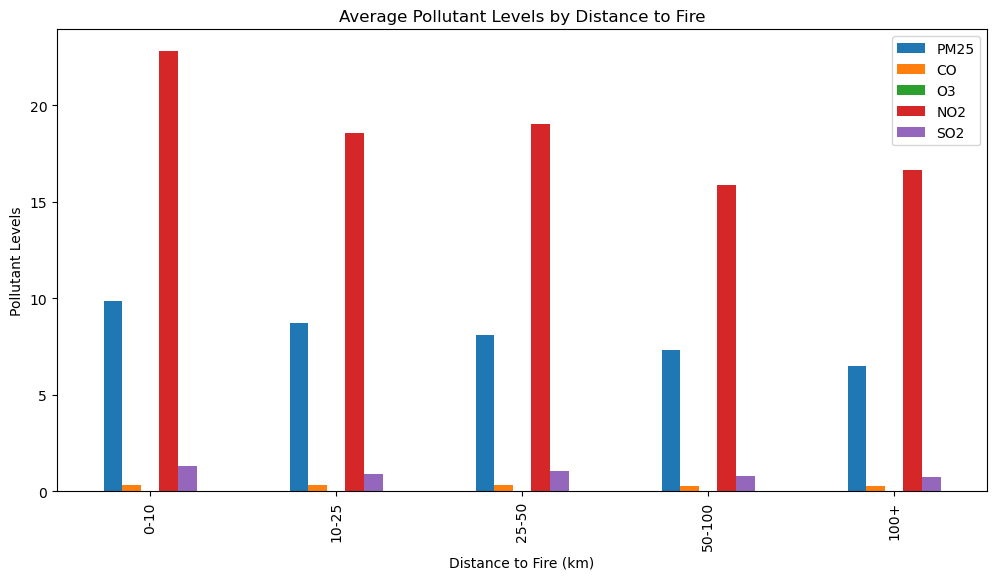

In [35]:
# Create distance bins
data['distance_bin'] = pd.cut(data['distance_to_fire_km'], bins=[0, 10, 25, 50, 100, 500], 
                            labels=['0-10','10-25','25-50','50-100','100+'])

# Average pollutant values by distance bin
distance_avg = data.groupby('distance_bin')[pollutants].mean()

distance_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Pollutant Levels by Distance to Fire')
plt.xlabel('Distance to Fire (km)')
plt.ylabel('Pollutant Levels')
plt.show()


NO2: As noted above, NO2 tends to remain on higher levels than the other pollutants, it is interesting to note that it is higher when the wildfire is closer.  

PM2.5: It increases as the wildfire gets closer, with it being highest when the wildfire was around 1-10 kms away from the monitoring site  

CO2, SO2, O3 : They are very small in value and do not seem to be affected much by wildfire and their distance to the sites.

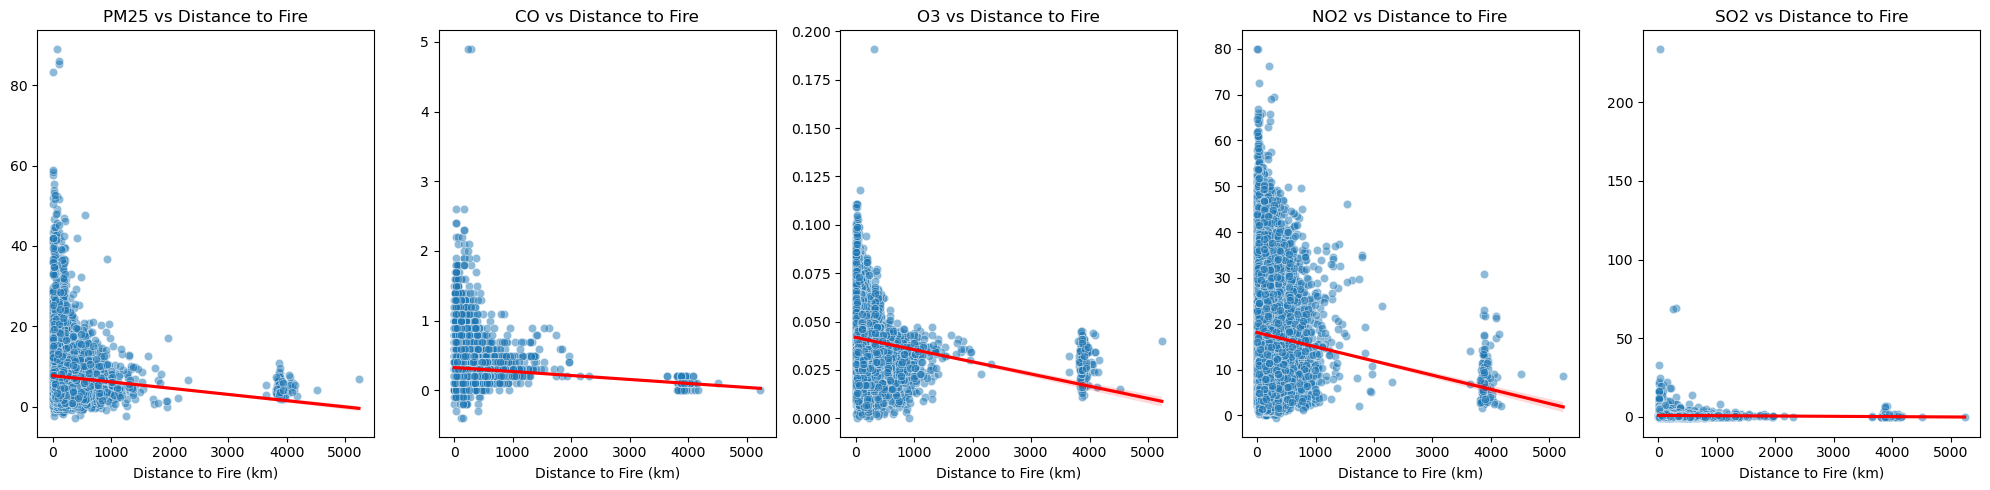

In [36]:
pollutants = ['PM25','CO','O3','NO2','SO2']

fig, axes = plt.subplots(1, len(pollutants), figsize=(20,5), sharey=False)

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(
        x='distance_to_fire_km', 
        y=pollutant, 
        data=data, 
        ax=axes[i], alpha=0.5
    )
    sns.regplot(
        x='distance_to_fire_km', 
        y=pollutant, 
        data=data, ax=axes[i], scatter=False, color='red'
    )
    axes[i].set_title(f'{pollutant} vs Distance to Fire')
    axes[i].set_xlabel('Distance to Fire (km)')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


Distance to wildfire affects pollutants as they spike up, with PM25 and NO2 being affected more. Compared to the bar graph here we can see that CO AND O3 also spike up closer to fire, SO3 is not affected by fire which makes sense since sulphur is not associated with wildfires.

In [38]:
data.columns

Index(['Unnamed: 0', 'date', 'site_id', 'latitude', 'longitude', 'state_name',
       'county_name', 'city_name', 'site_name', 'PM25', 'CO', 'O3', 'NO2',
       'SO2', 'AQI_PM25', 'AQI_CO', 'AQI_O3', 'AQI_NO2', 'AQI_SO2', 'AQI',
       'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
       'relative_humidity_2m_mean', 'wind_speed_10m_mean',
       'wind_direction_10m_dominant', 'precipitation_sum',
       'precipitation_hours', 'et0_fao_evapotranspiration', 'weather_code',
       'distance_to_fire_km', 'fire_brightness', 'fire_frp',
       'fires_within_50km', 'fires_within_100km', 'has_nearby_fire',
       'datetime', 'month', 'day_of_week', 'is_weekend', 'season',
       'wildfire_season', 'fire_distance_category', 'fire_intensity',
       'distance_bin'],
      dtype='object')

In [56]:

high_fire_exposure = data[(data['has_nearby_fire'] == True) & 
                          (data['distance_to_fire_km'] <= 50) &
                          (data['PM25'] > data['PM25'].mean())]

site_stats = high_fire_exposure.groupby('city_name').agg({
    'latitude':'first',
    'longitude':'first',
    'PM25':'mean',
    'CO':'mean',
    'O3':'mean',
    'NO2':'mean',
    'SO2':'mean',
    'fires_within_50km':'count'
}).reset_index()

# Creating a score based on PM25 and the number of fires within 50km
site_stats['priority_score'] = site_stats['PM25'] * site_stats['fires_within_50km']


fig = px.scatter_mapbox(
    site_stats,
    lat="latitude",
    lon="longitude",
    size="priority_score",
    color="priority_score",
    color_continuous_scale="Reds",
    size_max=20,
    zoom=5,
    mapbox_style="carto-positron",
    hover_name="city_name",
    hover_data={"latitude":False, "longitude":False, "priority_score":True}
)

fig.show()

C:\Users\karina mehta\AppData\Local\Temp\ipykernel_29692\2415164038.py:20: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



The priority score is a simple metric to identify which monitoring sites are most important for capturing wildfire pollution.

- Sites that experience frequent fires and show high PM2.5 spikes get a higher score.

In [65]:
# Aggregate by site_name
site_stats = high_fire_exposure.groupby('site_name').agg({
    'PM25':'mean',
    'CO':'mean',
    'O3':'mean',
    'NO2':'mean',
    'SO2':'mean',
    'fires_within_50km':'count'
}).reset_index()

# Priority score
site_stats['priority_score'] = site_stats['PM25'] * site_stats['fires_within_50km']

# Sort by priority
site_stats_sorted = site_stats.sort_values(by='priority_score', ascending=False)

# Display top 10 sites
site_stats_sorted.head(5)



,site_name,PM25,CO,O3,NO2,SO2,fires_within_50km,priority_score
37,Los Angeles-North Main Street,14.765163,0.598039,0.046020,31.345882,0.483529,255,3765.116667
56,Rubidoux,14.719242,0.523605,0.064639,26.300000,0.540773,233,3429.583333
45,North Birmingham,14.656619,0.303349,0.044469,21.437321,2.933493,209,3063.233333
9,Clinton,12.171048,0.353714,0.044023,26.542857,0.099429,175,2129.933333
25,GT Craig NCore PAMS,12.801042,0.365972,0.044132,24.375000,1.979167,144,1843.350000


Sites are ranked by a priority score (PM2.5 × nearby fires), highlighting locations most impacted by wildfire pollution. Los Angeles-North Main Street, Rubidoux, and North Birmingham have the highest scores, reflecting frequent nearby fires and elevated PM2.5, while lower-ranked sites experience fewer fires or lower pollution.
